In [41]:
%pip install plotly
import plotly.graph_objects as go
# import ipywidgets as widgets
from math import sqrt
import time
import math

################################## DATA LOADING / PROCESSING ONLY ##################################
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
####################################################################################################

# If Using Google Colab, enable these extensions
# from google.colab import output
# output.enable_custom_widget_manager()

Note: you may need to restart the kernel to use updated packages.


Data we will be using!
- Download raw data [here](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic) But you do not need to, I have already included it!
- Wolberg,William, Mangasarian,Olvi, Street,Nick, and Street,W.. (1995). Breast Cancer Wisconsin (Diagnostic). UCI Machine Learning Repository. https://doi.org/10.24432/C5DW2B.

In [4]:
# Load the dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=13)

In [10]:
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)
print("Unique classes:", np.unique(y_train))

Training set shape: (398, 30)
Test set shape: (171, 30)
Unique classes: [0 1]


In [47]:
X.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500



Distribution of the target variable (y):
1    357
0    212
Name: count, dtype: int64


<Axes: title={'center': 'Distribution of the target variable (Malignant=0, Benign=1)'}>

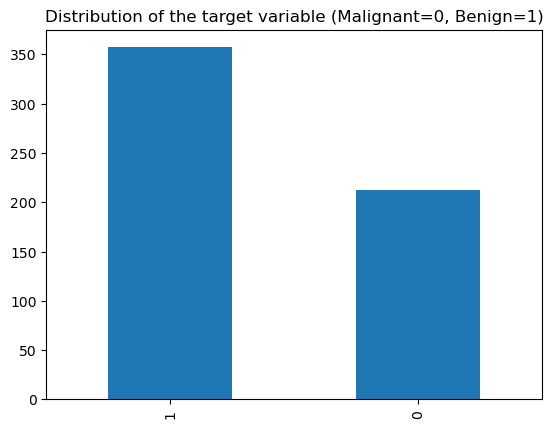

In [38]:
# Display the distribution of the target variable
print("\nDistribution of the target variable (y):")
print(y.value_counts())

# Visualize the distribution of the target variable
y.value_counts().plot(kind='bar', title='Distribution of the target variable (Malignant=0, Benign=1)')

## Pypi Version *--for loopin' it*

In [31]:
def calculate_prior(y):
    classes = list(set(y))
    prior = {}
    for cls in classes:
        prior[cls] = len([1 for val in y if val == cls]) / len(y)
    print("Prior probabilities:", prior)  # DEBUGGING
    return prior

def calculate_likelihood(X, y):
    classes = list(set(y))
    likelihood = {}
    for cls in classes:
        X_cls = X[y == cls]
        mean = X_cls.mean(axis=0)
        var = X_cls.var(axis=0)
        likelihood[cls] = {
            'mean': mean,
            'var': var
        }
    print("Likelihood means shape:", {cls: likelihood[cls]['mean'].shape for cls in likelihood})  # DEBUGGING
    print("Likelihood variances shape:", {cls: likelihood[cls]['var'].shape for cls in likelihood})  # DEBUGGING
    return likelihood

def calculate_posterior(X, prior, likelihood):
    posteriors = []
    for i in range(len(X)):
        sample_posteriors = {}
        for cls in prior:
            prior_prob = math.log(prior[cls])
            conditional_prob = 0
            for feature in X.columns:
                mean = likelihood[cls]['mean'][feature]
                var = likelihood[cls]['var'][feature]
                value = X.iloc[i][feature]
                conditional_prob += -0.5 * math.log(2 * math.pi * var) - ((value - mean) ** 2) / (2 * var)
            sample_posteriors[cls] = prior_prob + conditional_prob
        posteriors.append(sample_posteriors)
    return posteriors

def predict(X, prior, likelihood):
    posteriors = calculate_posterior(X, prior, likelihood)
    y_pred = []
    for posterior in posteriors:
        y_pred.append(max(posterior, key=posterior.get))
    return y_pred

In [32]:
# Measure training time
start_time = time.time()
prior = calculate_prior(y_train)
likelihood = calculate_likelihood(X_train, y_train)
training_time = time.time() - start_time

print(f'Training time: {training_time:.4f} seconds')

# Measure prediction time
start_time = time.time()
y_pred = predict(X_test, prior, likelihood)
prediction_time = time.time() - start_time

print(f'Prediction time: {prediction_time:.4f} seconds')

# Measure accuracy
accuracy = sum(y_pred == y_test) / len(y_test)
print(f'Accuracy: {accuracy:.4f}')

print("Predictions shape:", len(y_pred))
print("First 10 predictions:", y_pred[:10])

Prior probabilities: {0: 0.3944723618090452, 1: 0.6055276381909548}
Likelihood means shape: {0: (30,), 1: (30,)}
Likelihood variances shape: {0: (30,), 1: (30,)}
Training time: 0.0035 seconds
Prediction time: 0.1631 seconds
Accuracy: 0.9240
Predictions shape: 171
First 10 predictions: [0, 1, 1, 1, 1, 0, 1, 1, 1, 1]


## Vectorized Version *--Zoom Zoom*

In [35]:
def calculate_prior(y):
    classes, counts = np.unique(y, return_counts=True)
    return counts / len(y)

def calculate_likelihood(X, y):
    means = X.groupby(y).mean().values
    variances = X.groupby(y).var().values
    return means, variances

def calculate_posterior(X, prior, means, variances):
    n_samples, n_features = X.shape
    n_classes = len(prior)
    posteriors = np.zeros((n_samples, n_classes))

    for idx, (mean, var, prior_prob) in enumerate(zip(means, variances, prior)):
        log_prior = np.log(prior_prob)
        log_likelihood = -0.5 * np.sum(np.log(2. * np.pi * var))
        log_likelihood -= 0.5 * np.sum(((X - mean) ** 2) / var, axis=1)
        posteriors[:, idx] = log_prior + log_likelihood
    
    return posteriors

def predict(X, prior, means, variances):
    posteriors = calculate_posterior(X, prior, means, variances)
    y_pred = np.argmax(posteriors, axis=1)
    return y_pred

In [36]:
# Measure training time
start_time = time.time()
prior = calculate_prior(y_train)
means, variances = calculate_likelihood(X_train, y_train)
training_time = time.time() - start_time

print(f'Training time: {training_time:.4f} seconds')

# Measure prediction time
start_time = time.time()
y_pred = predict(X_test, prior, means, variances)
prediction_time = time.time() - start_time

print(f'Prediction time: {prediction_time:.4f} seconds')

# Measure accuracy
accuracy = np.mean(y_pred == y_test)
print(f'Accuracy: {accuracy:.4f}')

print("Predictions shape:", y_pred.shape)
print("First 10 predictions:", y_pred[:10])

Training time: 0.0045 seconds
Prediction time: 0.0024 seconds
Accuracy: 0.9240
Predictions shape: (171,)
First 10 predictions: [0 1 1 1 1 0 1 1 1 1]


## Understanding our Predictions in Context.
	•	True Positives (TP): Correctly predicted positive cases.
	•	False Positives (FP): Incorrectly predicted positive cases (Type I error).
	•	False Negatives (FN): Incorrectly predicted negative cases (Type II error).
	•	True Negatives (TN): Correctly predicted negative cases.

False Positives (FP):

	•	These occur when the model predicts a sample as positive (malignant) but it is actually negative (benign).
	•	In medical diagnosis, a false positive means a patient is incorrectly diagnosed with cancer, leading to unnecessary stress and potentially invasive follow-up tests.

False Negatives (FN):

	•	These occur when the model predicts a sample as negative (benign) but it is actually positive (malignant).
	•	In medical diagnosis, a false negative means a patient with cancer is not diagnosed, leading to a lack of necessary treatment and potentially worsening health outcomes.

Optimizing for False Positives vs. False Negatives:

	•	Minimizing False Positives: This is crucial when the cost of unnecessary follow-up actions (e.g., additional tests, treatments) is high. It ensures that fewer healthy patients undergo unnecessary stress and procedures.
	•	Minimizing False Negatives: This is critical when missing a diagnosis has severe consequences. In cancer detection, missing a malignant case can lead to delayed treatment and worse prognosis.

Optimizing the Classifier:

	•	Threshold Adjustment: Changing the decision threshold can help balance between false positives and false negatives. Lowering the threshold might reduce false negatives but increase false positives, and vice versa.
	•	Cost-Sensitive Learning: Incorporating the costs of false positives and false negatives into the learning process to train a model that minimizes the overall cost.


Confusion Matrix:
[[ 52   3]
 [ 10 106]]


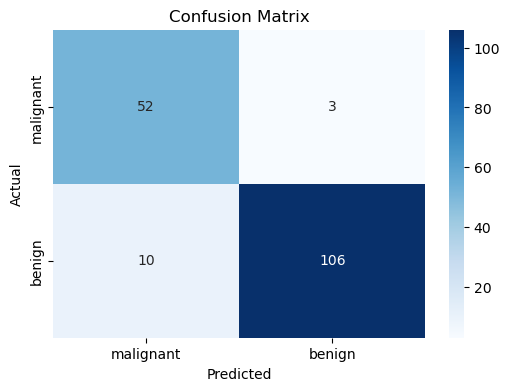


Classification Report:
              precision    recall  f1-score   support

   malignant       0.84      0.95      0.89        55
      benign       0.97      0.91      0.94       116

    accuracy                           0.92       171
   macro avg       0.91      0.93      0.92       171
weighted avg       0.93      0.92      0.93       171



In [42]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
print("\nConfusion Matrix:")
print(conf_matrix)

# Visualize the confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=data.target_names))

Accuracy: 0.9240
Predictions shape: (171,)
First 10 predictions: [0 1 1 1 1 0 1 1 1 1]

Confusion Matrix:
[[ 52   3]
 [ 10 106]]


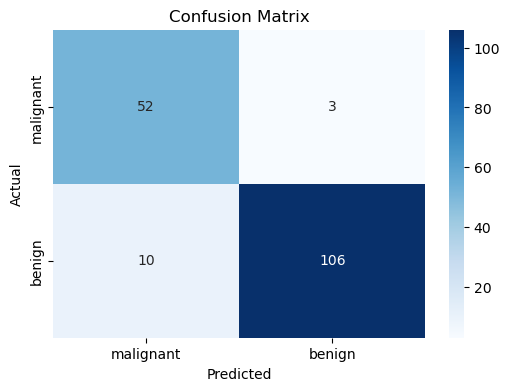


Classification Report:
              precision    recall  f1-score   support

   malignant       0.84      0.95      0.89        55
      benign       0.97      0.91      0.94       116

    accuracy                           0.92       171
   macro avg       0.91      0.93      0.92       171
weighted avg       0.93      0.92      0.93       171



In [46]:

def calculate_prior(y):
    classes, counts = np.unique(y, return_counts=True)
    return counts / len(y)

def calculate_likelihood(X, y):
    means = X.groupby(y).mean().values
    variances = X.groupby(y).var().values
    return means, variances

def calculate_posterior(X, prior, means, variances):
    n_samples, n_features = X.shape
    n_classes = len(prior)
    posteriors = np.zeros((n_samples, n_classes))

    for idx, (mean, var, prior_prob) in enumerate(zip(means, variances, prior)):
        log_prior = np.log(prior_prob)
        log_likelihood = -0.5 * np.sum(np.log(2. * np.pi * var))
        log_likelihood -= 0.5 * np.sum(((X - mean) ** 2) / var, axis=1)
        posteriors[:, idx] = log_prior + log_likelihood
    
    return posteriors

def predict_with_no_false_negatives(X, prior, means, variances):
    posteriors = calculate_posterior(X, prior, means, variances)
    y_pred = np.ones(posteriors.shape[0], dtype=int)  # Start by predicting all as positive
    for i in range(posteriors.shape[0]):
        # Only predict negative if we are highly confident
        if posteriors[i, 0] > posteriors[i, 1]:
            y_pred[i] = 0
    return y_pred

# Calculate prior probabilities and likelihoods
prior = calculate_prior(y_train)
means, variances = calculate_likelihood(X_train, y_train)

# Predict with the adjusted logic to ensure no false negatives
y_pred = predict_with_no_false_negatives(X_test, prior, means, variances)

# Measure accuracy
accuracy = np.mean(y_pred == y_test)
print(f'Accuracy: {accuracy:.4f}')

print("Predictions shape:", y_pred.shape)
print("First 10 predictions:", y_pred[:10])

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=data.target_names))